In [ ]:
# !pip install tensorflow 

In [ ]:
## New comment

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd


# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns

# for Q-Q plots
import scipy.stats as stats

#import model libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#import model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
#from xgboost import XGBRegressor



#import accuracy
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score



import warnings
warnings.filterwarnings('ignore')


In [ ]:
print(tf.__version__)

2.10.0


In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [ ]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [ ]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

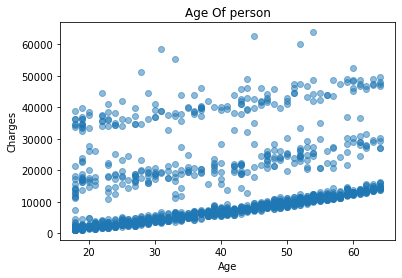

In [ ]:
plt.scatter(x=df['age'], y=df['charges'], alpha=0.5)


# Decorate
plt.title('Age Of person')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

<AxesSubplot:xlabel='sex', ylabel='count'>

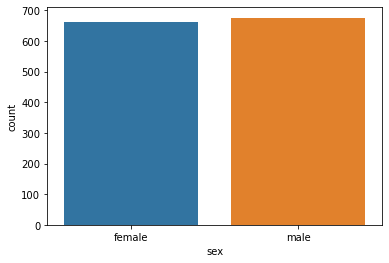

In [ ]:
sns.countplot(df['sex'])

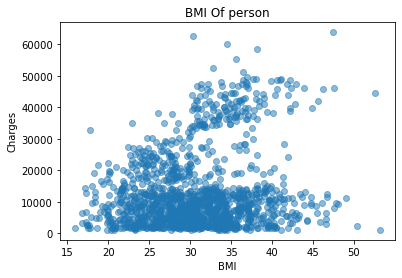

In [ ]:
plt.scatter(x=df['bmi'], y=df['charges'], alpha=0.5)


# Decorate
plt.title('BMI Of person')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
# plt.figure(figsize=(3,3))
# sns.heatmap(df.corr(),annot=True, mask=np.triu(df.corr()))
# plt.ylim(4,0)

In [ ]:
# drop dependent feature.

y=df['charges']

x=df.drop('charges', axis=1)

In [ ]:
# function to create distribution, histogram, Q-Q plot and boxplot


def diagnostic_plots(df):
    # function takes a dataframe (df) and
    # the list of variables of interest as arguments

    col=df._get_numeric_data().columns
    
    for ele in col:
        
        # define figure size
        plt.figure(figsize=(16, 4))
        
        # distribution
        plt.subplot(1, 4, 1)
        sns.distplot(df[ele])
        plt.title('Distribution')
        
        # histogram
        plt.subplot(1, 4, 2)
        sns.histplot(df[ele], bins=30)
        plt.title('Histogram')

        # Q-Q plot
        plt.subplot(1, 4, 3)
        stats.probplot(df[ele], dist="norm", plot=plt)
        plt.ylabel('Variable quantiles')

        # boxplot
        plt.subplot(1, 4, 4)
        sns.boxplot(y=df[ele])
        plt.title('Boxplot')
        
        
        plt.show()

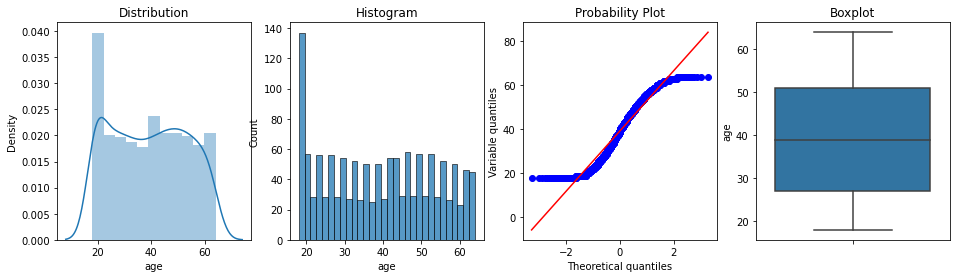

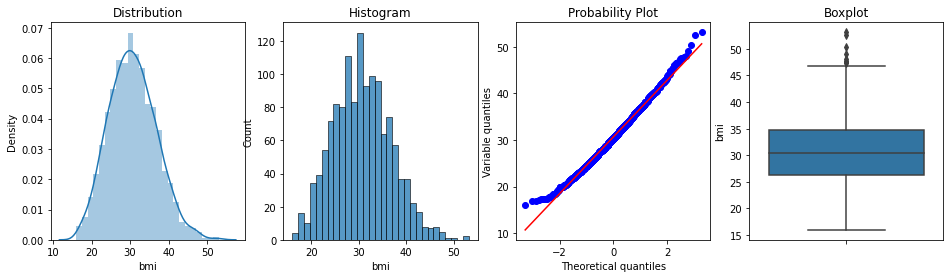

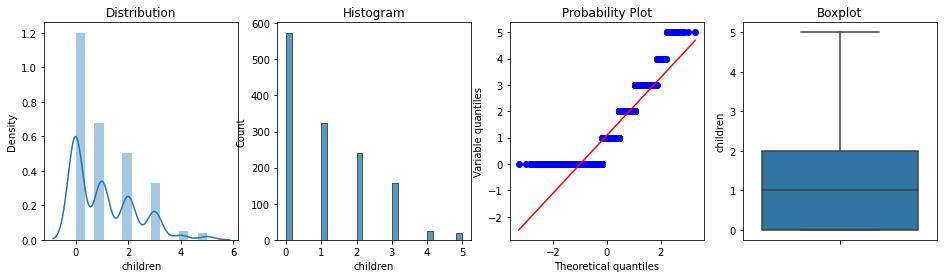

In [ ]:
diagnostic_plots(x)

In [ ]:
def remove_skew(df):
    
    col=df._get_numeric_data().columns
    
    for ele in col:
        
        if abs(df[ele].skew())>0.75:
            df[ele]=np.log(df[ele]+1)

In [ ]:
#remove_skew(x)

In [ ]:
#diagnostic_plots(x)

In [ ]:
def mod_outlier(df):
        
        num_col = df._get_numeric_data().columns
        
        for col in num_col:

            #q1 = df[col].quantile(0.25)
            #q3 = df[col].quantile(0.75)

            iqr = df[col].quantile(0.75) - df[col].quantile(0.25)    # iqr= q3-q1

            lower_bound = df[col].quantile(0.25) -(2 * iqr) 
            upper_bound = df[col].quantile(0.75) +(2 * iqr)

            df[col]= np.where(df[col] > upper_bound, upper_bound , np.where(df[col] < lower_bound, lower_bound, df[col]))    

#mod_outlier(x)

In [ ]:
x.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

In [ ]:
x_ = pd.get_dummies(x, drop_first=True, columns = ['sex','smoker','region'])
x_.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_, y, test_size = 0.2, random_state = 42)

In [ ]:
#feature scaling

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
def accuracy(yt,yp):
    return round(metrics.r2_score(yt, yp)*100 , 2)


model_acc={}

## ML Model Training

In [ ]:
# Random Forest

regressor = RandomForestRegressor(n_estimators = 100, random_state = 42)
regressor.fit(X_train, y_train)

y_pred = (regressor.predict(X_test))

model_acc['Random Forest']=accuracy(y_test, y_pred)

In [ ]:
# Decision Tree

regressor = DecisionTreeRegressor(random_state = 42)
regressor.fit(X_train, y_train)

y_pred = (regressor.predict(X_test))

model_acc['Decision Tree']=accuracy(y_test, y_pred)

In [ ]:
# LR

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = (regressor.predict(X_test))

model_acc['MultipleRegression Module']=accuracy(y_test, y_pred)

In [ ]:
model_acc

{'Random Forest': 86.56,
 'Decision Tree': 73.72,
 'MultipleRegression Module': 78.36}

## Neural Network

In [ ]:
x_.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


In [ ]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_, y, test_size = 0.2, random_state = 42)

In [ ]:
#feature scaling

# Note: for Neural network, it's better to do the feature scaling (bring down features value bw 0,1). i have tried both,
# and observed without features scaling the mae loss was about 6.5k, but with features scaling the loss came down to 2.7k

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 8), (268, 8), (1070,), (268,))

In [ ]:
# Create model

model_1  = tf.keras.Sequential([
    tf.keras.layers.Dense(30, input_shape=(8,), activation='relu'),
    tf.keras.layers.Dense(20,  activation='relu'),
    tf.keras.layers.Dense(10,  activation='relu'),
    tf.keras.layers.Dense(1)
])

# compile model

model_1.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['mse'])

# Fit the model

model_1.fit(X_train,y_train, epochs =100)

Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 13345.3877 - mse: 322426848.0000
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 13343.6465 - mse: 322368672.0000
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 13339.0244 - mse: 322218624.0000
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 13327.6973 - mse: 321856992.0000
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 13302.7432 - mse: 321068320.0000
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 13253.9209 - mse: 319580512.0000
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 13166.4541 - mse: 316954112.0000
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 13020.4727 - mse: 312492640.0000
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 12795.4150 - mse: 305927008.0000
Epoch 10/100
34/34 [==========================

In [ ]:
# Prediction

y_pred_1 = model_1.predict(X_test)
#y_pred

9/9 [==============================] - 0s 3ms/step


In [ ]:
model_1.evaluate(X_test,y_test)

9/9 [==============================] - 0s 4ms/step - loss: 2629.6172 - mse: 30909466.0000


[2629.6171875, 30909466.0]

In [ ]:
df['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [ ]:
## the Avg charges is around 13K, so 2.k loss should be ok i guess.

In [ ]:
list[(lambda ep: 1e-4 * 10**(ep/20))]

list[__main__.<lambda>]